# Street Fighter 2 AI

Notebooks provides basic setup for running street righter ai within the gym-retro environment.

## Example

In [1]:
# import roms
!python3 -m retro.import ../roms/

Importing SamuraiShodown-Genesis
Importing StreetFighterIISpecialChampionEdition-Genesis
Importing StreetFighterIISpecialChampionEdition-Genesis
Imported 3 games


In [2]:
import retro
import matplotlib.pyplot as plt

# Create the Street Fighter II environment
env = retro.make(game='StreetFighterIISpecialChampionEdition-Genesis', render_mode='rgb_array', record='../recordings/')

# Print environment details
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Box(0, 255, (200, 256, 3), uint8)
Action space: MultiBinary(12)


Reward received: 0.0
Game done: False
Truncated: False
Info: {'health': 176, 'enemy_health': 176, 'score': 0, 'enemy_matches_won': 0, 'matches_won': 0, 'continuetimer': 0}


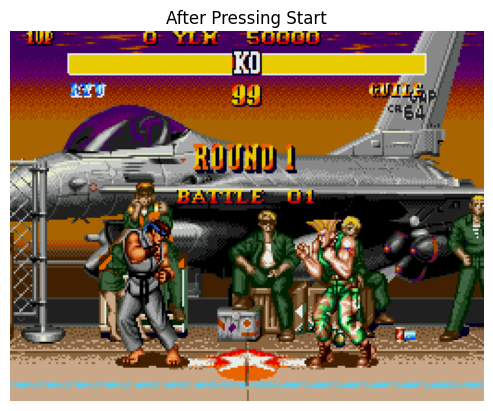

In [3]:
env_array, env_status = env.reset()

start_action = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  # Press Start
obs, reward, done, truncated, info = env.step(start_action)

print(f"Reward received: {reward}")
print(f"Game done: {done}")
print(f"Truncated: {truncated}")
print(f"Info: {info}")

plt.imshow(obs)
plt.title("After Pressing Start")
plt.axis('off')
plt.show()


In [5]:
type(env)

retro.retro_env.RetroEnv

In [9]:
info

{'health': 0,
 'enemy_health': 0,
 'score': 3500,
 'enemy_matches_won': 1,
 'matches_won': 0,
 'continuetimer': 0}

In [12]:
env.action_space

MultiBinary(12)

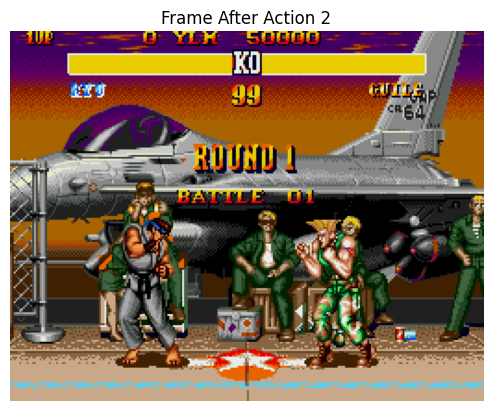

Reward received: 0.0
Game done: False
Truncated: False
Info: {'health': 176, 'enemy_health': 176, 'score': 0, 'enemy_matches_won': 0, 'matches_won': 0, 'continuetimer': 0}


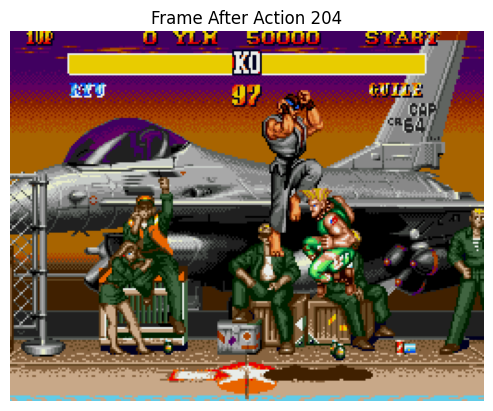

Reward received: 0.0
Game done: False
Truncated: False
Info: {'health': 154, 'enemy_health': 176, 'score': 0, 'enemy_matches_won': 0, 'matches_won': 0, 'continuetimer': 0}


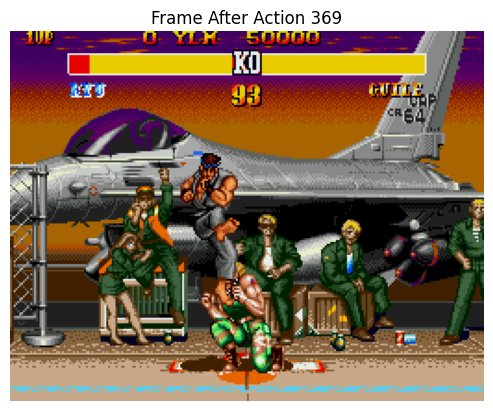

Reward received: 0.0
Game done: False
Truncated: False
Info: {'health': 123, 'enemy_health': 140, 'score': 0, 'enemy_matches_won': 0, 'matches_won': 0, 'continuetimer': 0}


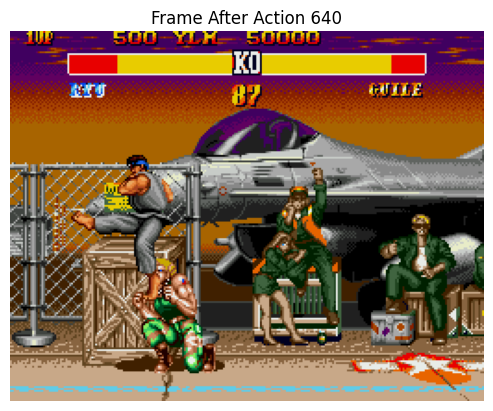

Reward received: 0.0
Game done: False
Truncated: False
Info: {'health': 91, 'enemy_health': 101, 'score': 500, 'enemy_matches_won': 0, 'matches_won': 0, 'continuetimer': 0}


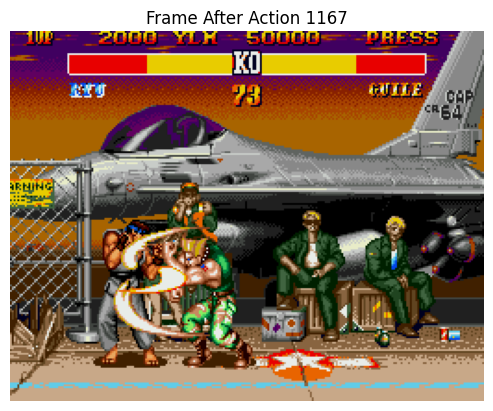

Reward received: 0.0
Game done: False
Truncated: False
Info: {'health': 67, 'enemy_health': 101, 'score': 2000, 'enemy_matches_won': 0, 'matches_won': 0, 'continuetimer': 0}


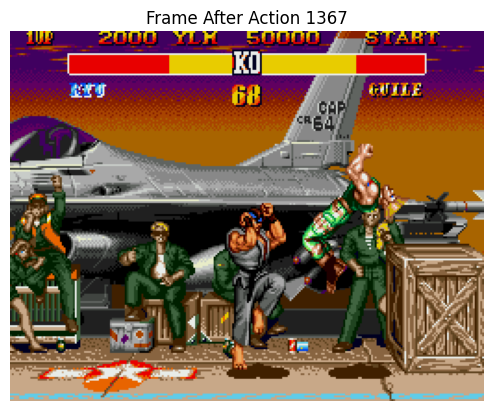

Reward received: 0.0
Game done: False
Truncated: False
Info: {'health': 44, 'enemy_health': 101, 'score': 2000, 'enemy_matches_won': 0, 'matches_won': 0, 'continuetimer': 0}


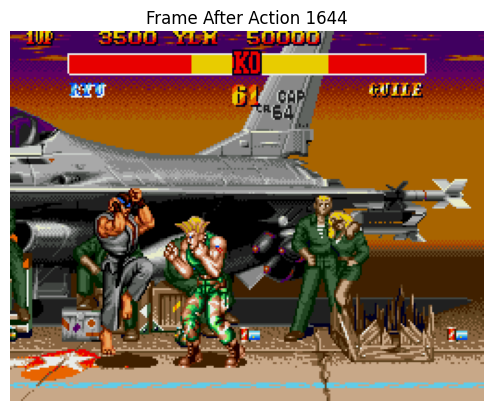

Reward received: 0.0
Game done: False
Truncated: False
Info: {'health': 19, 'enemy_health': 72, 'score': 3500, 'enemy_matches_won': 0, 'matches_won': 0, 'continuetimer': 0}


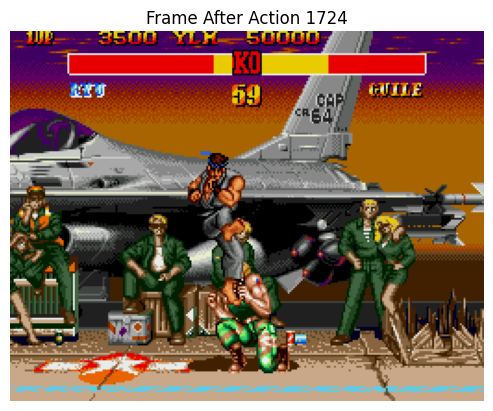

Reward received: 0.0
Game done: False
Truncated: False
Info: {'health': -1, 'enemy_health': 72, 'score': 3500, 'enemy_matches_won': 0, 'matches_won': 0, 'continuetimer': 0}
Game Over


In [4]:

start_action = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
env_step_action = env.step(start_action)

step = 0
p_score = 0
p_lives = 3
while True:

    # Take a random action
    rnd_action = env.action_space.sample()
    env_step_action = env.step(rnd_action)
    obs, reward, done, truncated, info = env_step_action
    step += 1

    score = info['health']
    lives = info['enemy_matches_won']
    enemy_health = info['enemy_health']
    health = info['health']
    
    if score < p_score or lives < p_lives :            

        p_score = score
        p_lives = lives
        
        plt.imshow(obs)
        plt.title(f"Frame After Action {step + 1}")
        plt.axis('off')
        plt.show()

        print(f"Reward received: {reward}")
        print(f"Game done: {done}")
        print(f"Truncated: {truncated}")
        print(f"Info: {info}")
    
    # End the loop if the game is done
    if enemy_health == 0 or health == 0 or done:
        print("Game Over")
        break


In [5]:
env.close()

In [6]:
!xvfb-run -s "-screen 0 1400x900x24" python3 -m retro.scripts.playback_movie ../recordings/StreetFighterIISpecialChampionEdition-Genesis-Champion.Level1.RyuVsGuile-000000.bk2

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/aarch64-linux-gnu --incdir=/usr/include/aarch64-linux-gnu --arch=arm64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis -